# Project Title: Economic and Market Cycle Prediction through Macroeconomic Analysis

# GitHub Link: https://github.com/cs418-fa24/project-check-in-team-6/

# Project Introduction

The goal of this project is to analyze and model the relationships between macroeconomic indicators and market cycles. We are using historical economic data, including interest rates, inflation rates, and unemployment data, to predict periods of market expansion and recession. These periods of market regimes are often influenced by various economic variables, and the objective is to identify the most significant indicators for predicting market cycles.

## Research Questions:
- **Which economic indicators are most predictive of market recessions and expansions?**
- **Can machine learning models, such as Random Forest and XGBoost, accurately predict market regimes based on economic data?**



In [506]:
import sys
import pandas as pd
import plotly.express as px

In [539]:
import sys
sys.path.append('../src')

import pandas as pd

import sys
sys.path.append('/Users/satyakapardibudi/Desktop/dsproject')
import data_preparation
import data_understanding
import feature_importance
import plotly.express as px

**To effectively explore the features of the FRED-MD dataset and better understand the outputs of our prediction models, it is essential to access the detailed feature descriptions. These descriptions are available in the appendix files**

In [540]:
# Get FRED-MD features specification
fredmd_features_desc = get_fredmd_feat_desc(file_name = 'FRED-MD_historic_appendix.csv')

# Save data into a CSV file
fredmd_features_desc.to_csv('/Users/satyakapardibudi/Downloads/FRED-MD Appendix/fredmd_feat_spec.csv')

# Show data
fredmd_features_desc

,Feature,Description,Group,TCode
ID,,,,
1,RPI,Real Personal Income,Output and Income,5
2,W875RX1,Real personal income ex transfer receipts,Output and Income,5
3,DPCERA3M086SBEA,Real personal consumption expenditures,"Consumption, Orders and Inventories",5
4,CMRMTSPLx,Real Manu. and Trade Industries Sales,"Consumption, Orders and Inventories",5
5,RETAILx,Retail and Food Services Sales,"Consumption, Orders and Inventories",5
...,...,...,...,...
131,MZMSL,MZM Money Stock,Money and Credit,6
132,DTCOLNVHFNM,Consumer Motor Vehicle Loans Outstanding,Money and Credit,6
133,DTCTHFNM,Total Consumer Loans and Leases Outstanding,Money and Credit,6


In [541]:
# Get FRED-MD latest dataset
fredmd_ds = get_fredmd_ds(ds_name = 'current')

# Save data into a CSV file
fredmd_ds.to_csv('/Users/satyakapardibudi/Downloads/FRED-MD Appendix/fredmd_feat_ds.csv')

# Show data
fredmd_ds

,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,...,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx
Date,,,,,,,,,,,,,,,,,,,,,
Transform:,5.000,5.0,5.000,5.000000e+00,5.00000,5.0000,5.0000,5.0000,5.0000,5.0000,...,6.000,6.000,6.00,6.00,6.00,2.0,6.00,6.00,6.0000,1.0000
1/1/1959,2583.560,2426.0,15.188,2.766768e+05,18235.77392,21.9616,23.3868,22.2620,31.6664,18.9498,...,18.294,10.152,2.13,2.45,2.04,NaN,6476.00,12298.00,84.2043,NaN
2/1/1959,2593.596,2434.8,15.346,2.787140e+05,18369.56308,22.3917,23.7024,22.4549,31.8987,19.0492,...,18.302,10.167,2.14,2.46,2.05,NaN,6476.00,12298.00,83.5280,NaN
3/1/1959,2610.396,2452.7,15.491,2.777753e+05,18523.05762,22.7142,23.8459,22.5651,31.8987,19.4223,...,18.289,10.185,2.15,2.45,2.07,NaN,6508.00,12349.00,81.6405,NaN
4/1/1959,2627.446,2470.0,15.435,2.833627e+05,18534.46600,23.1981,24.1903,22.8957,32.4019,19.5466,...,18.300,10.221,2.16,2.47,2.08,NaN,6620.00,12484.00,81.8099,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5/1/2024,20025.483,16366.3,120.279,1.511598e+06,704309.00000,103.0711,100.9332,100.8207,101.9156,105.4461,...,119.951,127.326,30.93,35.47,27.65,69.1,542427.10,927303.15,5174.3603,12.8609
6/1/2024,20052.066,16382.3,120.443,1.518826e+06,702350.00000,103.2258,101.2902,101.0985,102.3600,105.4324,...,119.633,127.646,31.06,35.58,27.79,68.2,544655.88,926980.66,5237.0984,12.6826
7/1/2024,20085.031,16396.9,120.949,1.529844e+06,710851.00000,102.5863,100.7325,100.4581,101.5655,100.0630,...,119.775,127.966,31.20,35.70,27.96,66.4,547620.02,930576.62,5279.1498,14.4084


**Each business cycle is characterized by two pivotal junctures: the trough, representing the lowest point, and the peak, signifying the highest point. The normal phase spans from the trough of the preceding cycle to the peak of the current cycle, while the recession phase is measured from the peak to the trough.**

In [542]:
# Generate NBER business cycle labels at a monthly resolution
econ_regime_df = get_nber_cycles(months_ignored=15)

# Show data
econ_regime_df

,Regime
Date,
1857-06-01,1
1857-07-01,1
1857-08-01,1
1857-09-01,1
1857-10-01,1
...,...
2023-04-01,0
2023-05-01,0
2023-06-01,0


In [543]:
# Generate NBER business cycle labels at a monthly resolution
econ_regime_df = get_fred_cycles(months_ignored=0)

# Save data into a CSV file
econ_regime_df.to_csv('/Users/satyakapardibudi/Downloads/FRED-MD Appendix/nber_regimes.csv')

# Show data
econ_regime_df

,EconRegime
Date,
1854-12-01,1
1855-01-01,0
1855-02-01,0
1855-03-01,0
1855-04-01,0
...,...
2024-06-01,0
2024-07-01,0
2024-08-01,0


In [544]:
# Generate S&P500 OHLC data at a monthly resolution
sp500_monthly_df = get_sp500_monthly()

# Save data into a CSV file
sp500_monthly_df.to_csv('/Users/satyakapardibudi/Downloads/FRED-MD Appendix/SP500_monthly.csv')

# Show data
sp500_monthly_df

,Open,High,Low,Close
Date,,,,
1927-12-01 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000
1928-01-01 00:00:00-05:00,17.760000,17.760000,17.260000,17.570000
1928-02-01 00:00:00-05:00,17.530001,17.629999,16.950001,17.260000
1928-03-01 00:00:00-05:00,17.299999,19.280001,17.299999,19.280001
1928-04-01 00:00:00-05:00,18.910000,19.750000,18.910000,19.750000
...,...,...,...,...
2024-07-01 00:00:00-04:00,5471.080078,5669.669922,5390.950195,5522.299805
2024-08-01 00:00:00-04:00,5537.839844,5651.620117,5119.259766,5648.399902
2024-09-01 00:00:00-04:00,5623.890137,5767.370117,5402.620117,5762.479980


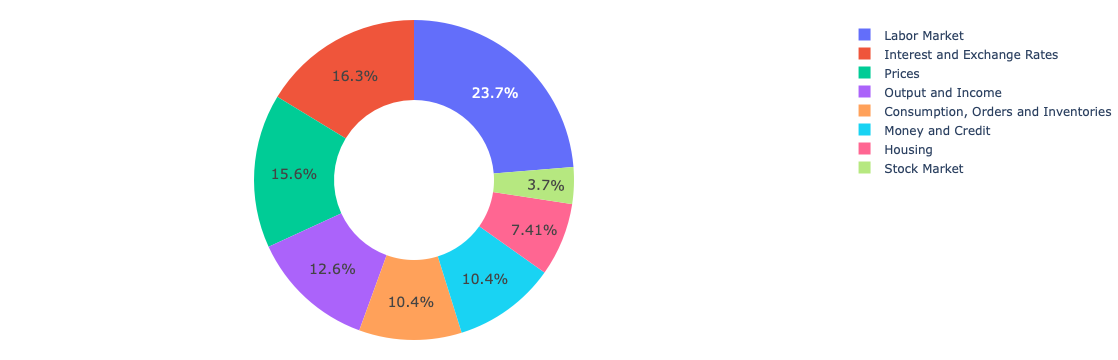

In [545]:
import plotly.express as px

# Count the number of features in each group
feature_group_count = fredmd_features_desc['Group'].value_counts().reset_index(name='FeaturesCount')
feature_group_count.columns = ['Group', 'FeaturesCount']

# Create a pie chart
fig = px.pie(feature_group_count, values='FeaturesCount', names='Group', hole=0.5)
fig.update_layout(margin=dict(t=20, b=20, l=0, r=0), uniformtext_minsize=14, uniformtext_mode='hide')
fig.show()


In [546]:
group_name = 'Money and Credit'

# Filter out requested group features
fredmd_features_desc[fredmd_features_desc['Group']==group_name]

,Feature,Description,Group,TCode
ID,,,,
70,M1SL,M1 Money Stock,Money and Credit,6
71,M2SL,M2 Money Stock,Money and Credit,6
72,M2REAL,Real M2 Money Stock,Money and Credit,5
73,BOGMBASE,Monetary Base,Money and Credit,6
74,TOTRESNS,Total Reserves of Depository Institutions,Money and Credit,6
75,NONBORRES,Reserves Of Depository Institutions,Money and Credit,7
76,BUSLOANS,Commercial and Industrial Loans,Money and Credit,6
77,REALLN,Real Estate Loans at All Commercial Banks,Money and Credit,6
78,NONREVSL,Total Nonrevolving Credit,Money and Credit,6


In [547]:
feat_mnemo = 'BOGMBASE'
print(f'URL for {feat_mnemo} on the FRED: https://fred.stlouisfed.org/series/{feat_mnemo}')

URL for BOGMBASE on the FRED: https://fred.stlouisfed.org/series/BOGMBASE


In [548]:
# Show data
fredmd_ds

,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,...,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx
Date,,,,,,,,,,,,,,,,,,,,,
Transform:,5.000,5.0,5.000,5.000000e+00,5.00000,5.0000,5.0000,5.0000,5.0000,5.0000,...,6.000,6.000,6.00,6.00,6.00,2.0,6.00,6.00,6.0000,1.0000
1/1/1959,2583.560,2426.0,15.188,2.766768e+05,18235.77392,21.9616,23.3868,22.2620,31.6664,18.9498,...,18.294,10.152,2.13,2.45,2.04,NaN,6476.00,12298.00,84.2043,NaN
2/1/1959,2593.596,2434.8,15.346,2.787140e+05,18369.56308,22.3917,23.7024,22.4549,31.8987,19.0492,...,18.302,10.167,2.14,2.46,2.05,NaN,6476.00,12298.00,83.5280,NaN
3/1/1959,2610.396,2452.7,15.491,2.777753e+05,18523.05762,22.7142,23.8459,22.5651,31.8987,19.4223,...,18.289,10.185,2.15,2.45,2.07,NaN,6508.00,12349.00,81.6405,NaN
4/1/1959,2627.446,2470.0,15.435,2.833627e+05,18534.46600,23.1981,24.1903,22.8957,32.4019,19.5466,...,18.300,10.221,2.16,2.47,2.08,NaN,6620.00,12484.00,81.8099,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5/1/2024,20025.483,16366.3,120.279,1.511598e+06,704309.00000,103.0711,100.9332,100.8207,101.9156,105.4461,...,119.951,127.326,30.93,35.47,27.65,69.1,542427.10,927303.15,5174.3603,12.8609
6/1/2024,20052.066,16382.3,120.443,1.518826e+06,702350.00000,103.2258,101.2902,101.0985,102.3600,105.4324,...,119.633,127.646,31.06,35.58,27.79,68.2,544655.88,926980.66,5237.0984,12.6826
7/1/2024,20085.031,16396.9,120.949,1.529844e+06,710851.00000,102.5863,100.7325,100.4581,101.5655,100.0630,...,119.775,127.966,31.20,35.70,27.96,66.4,547620.02,930576.62,5279.1498,14.4084


In [549]:
sp500_monthly_df.index = sp500_monthly_df.index.tz_localize(None)

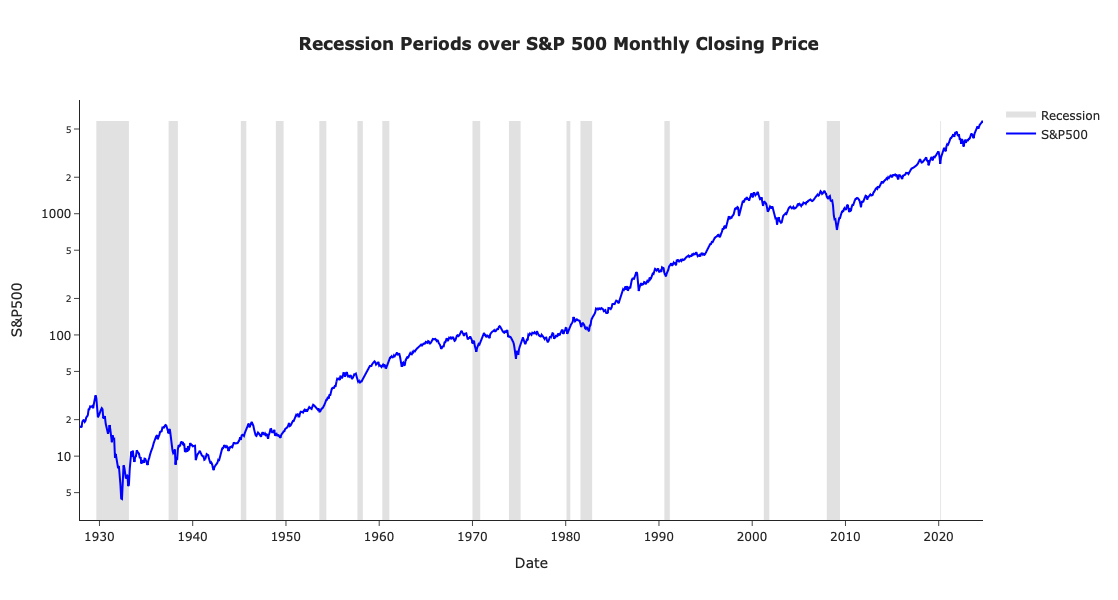

In [550]:
# Concat SP500 and recession data in a new dataframe
plot_df = pd.concat([sp500_monthly_df[['Close']], econ_regime_df], axis=1).dropna()
plot_df.reset_index(inplace=True)

# Plot recession periods and SP500 closing price
plot_regimes(date_series = plot_df['Date'],
             data_series = plot_df['Close'], 
             regime_series = plot_df['EconRegime'],
             area_name = 'Recession',
             data_name = 'S&P500',
             x_axis_title = 'Date',
             y_axis_title = 'S&P500',
             plot_title = 'Recession Periods over S&P 500 Monthly Closing Price',
             log_scale = True,
             line_color = 'blue',
             width = 1200,
             height = 600)

**Indentify features that exhibit a notable proportion of missing values. For features that manifest more than 10 instances of missing data
After removing irrelevant data, we focus on handling the missing values. The gaps are filled by using information from previous time points to estimate the missing values.**

In [551]:
# Read the raw features dataset
raw_features_df = pd.read_csv('/Users/satyakapardibudi/Downloads/FRED-MD Appendix/fredmd_feat_ds.csv')

df = DataCleaning(data=raw_features_df)

# remove rows with more than 10 null features
df.remove_null_rows(max_null=10, inplace=True)

# remove features with more than 10 null rows
df.remove_null_features(max_null=10, inplace=True)

# Forward fill null observations 
df.fill_null_obs(inplace=True)

# save the cleaned dataframe
cleaned_features_df = df.data


# Change the date column name
cleaned_features_df.rename(columns={'sasdate': 'Date'}, inplace=True)

cleaned_features_df

,Date,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,...,PCEPI,DDURRG3M086SBEA,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,DTCOLNVHFNM,DTCTHFNM,INVEST
0,Transform:,5.000,5.0,5.000,5.000000e+00,5.00000,5.0000,5.0000,5.0000,5.0000,...,6.000,6.000,6.000,6.000,6.00,6.00,6.00,6.00,6.00,6.0000
13,1/1/1960,2695.694,2537.6,15.789,2.869310e+05,18763.67069,24.1658,25.3094,24.0804,33.9891,...,15.421,63.672,18.410,10.466,2.22,2.57,2.13,7362.00,14063.00,75.4515
14,2/1/1960,2698.789,2539.9,15.858,2.910937e+05,18833.15808,23.9508,25.1659,23.9978,33.6020,...,15.437,63.775,18.411,10.484,2.23,2.59,2.14,7396.00,14144.00,73.3363
15,3/1/1960,2703.859,2542.2,16.083,2.830449e+05,18812.41558,23.7357,25.0798,23.9702,33.6407,...,15.446,63.589,18.445,10.490,2.24,2.69,2.14,7456.00,14239.00,71.5296
16,4/1/1960,2713.243,2551.4,16.331,2.858474e+05,19306.08721,23.5476,25.1372,23.9978,33.8730,...,15.502,63.665,18.561,10.512,2.23,2.61,2.14,7582.00,14413.00,71.4718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785,5/1/2024,20025.483,16366.3,120.279,1.511598e+06,704309.00000,103.0711,100.9332,100.8207,101.9156,...,123.224,105.624,119.951,127.326,30.93,35.47,27.65,542427.10,927303.15,5174.3603
786,6/1/2024,20052.066,16382.3,120.443,1.518826e+06,702350.00000,103.2258,101.2902,101.0985,102.3600,...,123.369,105.631,119.633,127.646,31.06,35.58,27.79,544655.88,926980.66,5237.0984
787,7/1/2024,20085.031,16396.9,120.949,1.529844e+06,710851.00000,102.5863,100.7325,100.4581,101.5655,...,123.571,105.318,119.775,127.966,31.20,35.70,27.96,547620.02,930576.62,5279.1498
788,8/1/2024,20108.056,16414.2,121.149,1.530114e+06,711291.00000,102.9329,101.0386,100.9656,102.1276,...,123.713,105.068,119.651,128.268,31.26,35.78,27.98,549670.11,933587.03,5327.5375


In [552]:
df = FeatureEngineering(data = cleaned_features_df)

# apply transformations to the cleaned dataset of features
df.transform_features()

# add new lagged features to the dataset
df.add_lagged_features(lag_values = [1,3,6,9,12])

# Save features dataset in a new dataframe and save it into a new .csv file for future uses
final_features_df = df.data
final_features_df.to_csv('/Users/satyakapardibudi/Downloads/FRED-MD Appendix/feats_ds.csv', index=False)

# Show final features dataframe
final_features_df.set_index('Date')

,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,...,DTCTHFNM 1M Lag,DTCTHFNM 3M Lag,DTCTHFNM 6M Lag,DTCTHFNM 9M Lag,DTCTHFNM 12M Lag,INVEST 1M Lag,INVEST 3M Lag,INVEST 6M Lag,INVEST 9M Lag,INVEST 12M Lag
Date,,,,,,,,,,,,,,,,,,,,,
1961-03-01,0.007984,0.004994,0.015978,0.035789,0.006938,0.004847,0.005932,0.001190,0.005908,-0.005453,...,-0.014290,0.010355,0.016761,0.027577,0.012437,0.017181,0.030858,0.013662,-0.004001,-0.053379
1961-04-01,0.006236,0.008374,0.012843,-0.005569,-0.007350,0.026413,0.020011,0.017738,0.023283,0.069999,...,-0.014799,0.000653,0.004461,0.031706,0.018840,-0.004491,0.029080,0.037561,0.018194,-0.025753
1961-05-01,0.009857,0.009413,0.006578,-0.000731,-0.002936,0.035632,0.022240,0.024722,0.034724,0.101383,...,-0.010637,-0.014290,0.001635,0.026114,0.022225,-0.007909,0.017181,0.040770,0.026257,0.002181
1961-06-01,0.017124,0.013943,0.008472,0.046347,0.022330,0.029190,0.017330,0.017433,0.022753,0.064217,...,-0.003451,-0.014799,0.010355,0.016761,0.027577,0.006990,-0.004491,0.030858,0.013662,-0.004001
1961-07-01,0.012255,0.010356,-0.000613,-0.002086,0.006635,0.025348,0.018348,0.016147,0.020271,0.050614,...,0.005630,-0.010637,0.000653,0.004461,0.031706,0.028577,-0.007909,0.029080,0.037561,0.018194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-01,0.005656,0.005932,0.004809,0.003707,0.000811,0.005375,0.002841,0.002423,0.004919,-0.024859,...,0.003053,0.000028,0.005452,0.009073,0.005954,0.009569,0.004130,-0.012364,-0.013768,-0.027872
2024-06-01,0.005909,0.005988,0.006230,0.010948,-0.000471,0.008454,0.007794,0.005138,0.006945,-0.005883,...,0.004752,0.000110,0.006046,0.008152,0.019540,-0.006749,0.018742,0.010477,-0.014359,-0.011302
2024-07-01,0.002969,0.001868,0.005555,0.011998,0.009246,-0.004715,-0.001990,-0.003603,-0.003441,-0.052400,...,0.002350,0.003053,0.004203,0.005949,0.019407,0.014386,0.009569,0.017335,-0.014706,-0.009812


In [521]:
econ_regimes = pd.read_csv('/Users/satyakapardibudi/Downloads/FRED-MD Appendix/nber_regimes.csv', parse_dates = ['Date']) 
econ_regimes.set_index('Date')

,EconRegime
Date,
1854-12-01,1
1855-01-01,0
1855-02-01,0
1855-03-01,0
1855-04-01,0
...,...
2024-06-01,0
2024-07-01,0
2024-08-01,0


In [522]:
# Read SP500 monthly OHLC data
sp500_mn_df = pd.read_csv('/Users/satyakapardibudi/Downloads/FRED-MD Appendix/SP500_monthly.csv', index_col='Date')

# Apply l1-trend-filtering
df = TrendFiltering(mkt_data = sp500_mn_df)
mkt_regimes = df.l1_trend_filter()

# Save data into a CSV file
mkt_regimes.to_csv('/Users/satyakapardibudi/Downloads/FRED-MD Appendix/mkt_regimes.csv')

# Show Data
mkt_regimes

,MktRegime
Date,
1928-01-01 00:00:00-05:00,0
1928-02-01 00:00:00-05:00,0
1928-03-01 00:00:00-05:00,0
1928-04-01 00:00:00-05:00,0
1928-05-01 00:00:00-04:00,0
...,...
2024-07-01 00:00:00-04:00,0
2024-08-01 00:00:00-04:00,0
2024-09-01 00:00:00-04:00,0


In [523]:
# Concat sp500 and crash data in a new dataframe
plot_df = pd.concat([sp500_mn_df[['Close']], mkt_regimes], axis=1).dropna()
plot_df.reset_index(inplace=True)

# Plot crash periods and SP500 closing price
plot_regimes(date_series = plot_df['Date'],
             data_series = plot_df['Close'], 
             regime_series = plot_df['MktRegime'],
             area_name = 'Crash',
             data_name = 'S&P500',
             x_axis_title = 'Date',
             y_axis_title = 'S&P500',
             plot_title = 'Crash Periods over S&P 500 Monthly Closing Price',
             log_scale = True,
             line_color = 'blue',
             width = 1200,
             height = 600)

In [524]:
# Combine the features dataset with economic regime labels
econ_regs_ds = final_features_df.join(econ_regimes.set_index('Date'), on='Date', how='left')

# Set the 'Date' as the index and remove any rows with missing values
econ_regs_ds.dropna(subset=['EconRegime'], inplace=True)

# Save the resulting dataframe to a new CSV file
econ_regs_ds.to_csv('/Users/satyakapardibudi/Downloads/FRED-MD Appendix/econ_regs_ds.csv')

# Display the final dataset
econ_regs_ds


,Date,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,...,DTCTHFNM 3M Lag,DTCTHFNM 6M Lag,DTCTHFNM 9M Lag,DTCTHFNM 12M Lag,INVEST 1M Lag,INVEST 3M Lag,INVEST 6M Lag,INVEST 9M Lag,INVEST 12M Lag,EconRegime
27,1961-03-01,0.007984,0.004994,0.015978,0.035789,0.006938,0.004847,0.005932,0.001190,0.005908,...,0.010355,0.016761,0.027577,0.012437,0.017181,0.030858,0.013662,-0.004001,-0.053379,0
28,1961-04-01,0.006236,0.008374,0.012843,-0.005569,-0.007350,0.026413,0.020011,0.017738,0.023283,...,0.000653,0.004461,0.031706,0.018840,-0.004491,0.029080,0.037561,0.018194,-0.025753,0
29,1961-05-01,0.009857,0.009413,0.006578,-0.000731,-0.002936,0.035632,0.022240,0.024722,0.034724,...,-0.014290,0.001635,0.026114,0.022225,-0.007909,0.017181,0.040770,0.026257,0.002181,0
30,1961-06-01,0.017124,0.013943,0.008472,0.046347,0.022330,0.029190,0.017330,0.017433,0.022753,...,-0.014799,0.010355,0.016761,0.027577,0.006990,-0.004491,0.030858,0.013662,-0.004001,0
31,1961-07-01,0.012255,0.010356,-0.000613,-0.002086,0.006635,0.025348,0.018348,0.016147,0.020271,...,-0.010637,0.000653,0.004461,0.031706,0.028577,-0.007909,0.029080,0.037561,0.018194,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785,2024-05-01,0.005656,0.005932,0.004809,0.003707,0.000811,0.005375,0.002841,0.002423,0.004919,...,0.000028,0.005452,0.009073,0.005954,0.009569,0.004130,-0.012364,-0.013768,-0.027872,0
786,2024-06-01,0.005909,0.005988,0.006230,0.010948,-0.000471,0.008454,0.007794,0.005138,0.006945,...,0.000110,0.006046,0.008152,0.019540,-0.006749,0.018742,0.010477,-0.014359,-0.011302,0
787,2024-07-01,0.002969,0.001868,0.005555,0.011998,0.009246,-0.004715,-0.001990,-0.003603,-0.003441,...,0.003053,0.004203,0.005949,0.019407,0.014386,0.009569,0.017335,-0.014706,-0.009812,0
788,2024-08-01,0.002788,0.001945,0.005845,0.007405,0.012650,-0.002842,-0.002487,-0.001315,-0.002273,...,0.004752,0.000028,0.005452,0.009073,0.020049,-0.006749,0.004130,-0.012364,-0.013768,0


**Below block of code generates a set of violin plots to visualize the distribution of continuous features against the economic regime (EconRegime). Each plot displays how the selected features (RPI, INDPRO, IPFPNSS, RETAILx) behave under different economic regimes (e.g., expansion or recession). Here's a breakdown:**

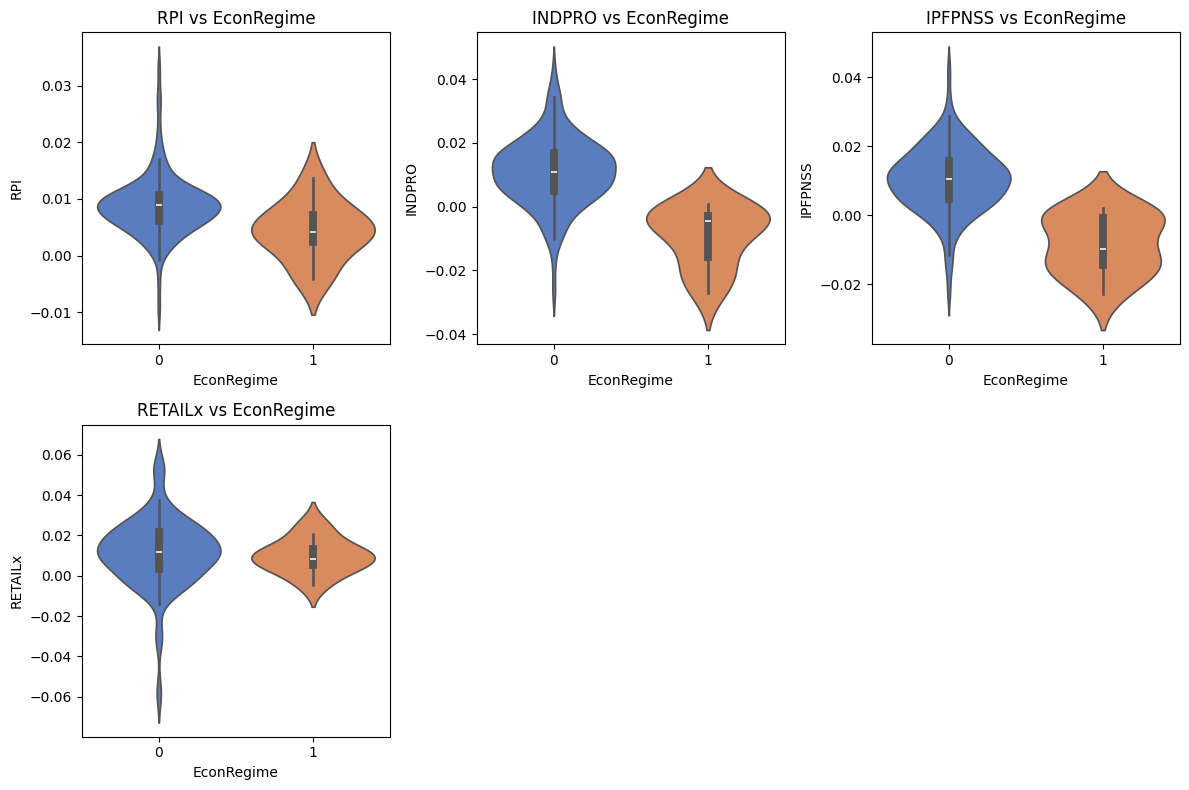

In [525]:
# Violin plot for continuous features against target
plt.figure(figsize=(12, 8))
for i, feature in enumerate(['RPI', 'INDPRO', 'IPFPNSS', 'RETAILx']):
    plt.subplot(2, 3, i+1)
    sns.violinplot(x='EconRegime', y=feature, data=df_tt, palette='muted')
    plt.title(f'{feature} vs EconRegime')
plt.tight_layout()
plt.show()

**The below plot provides an interactive visualization of how the Real Personal Income (RPI) changes over time, with zooming and hover capabilities for a better understanding of the data.**

In [526]:
import plotly.express as px

# Time Series plot of Real Personal Income (RPI)
fig = px.line(final_features_df, x='Date', y='RPI', title='Time Series of Real Personal Income (RPI)')
fig.update_xaxes(title='Date')
fig.update_yaxes(title='RPI')
fig.show()


In [527]:
# Selecting columns to plot
cols_to_plot = ['Date', 'RPI', 'RETAILx', 'INDPRO']
df_to_plot = final_features_df[cols_to_plot]

# Plot multiple time series
fig = px.line(df_to_plot, x='Date', y=cols_to_plot[1:], title='Multiple Time Series')
fig.update_xaxes(title='Date')
fig.update_yaxes(title='Value')
fig.show()


**Above plot visualizes the trends of multiple economic indicators (RPI, RETAILx, INDPRO) over time, allowing for comparison of these time series on a shared x-axis (Date).**

In [528]:
fig = px.scatter(final_features_df, x='RPI', y='RETAILx', title='Scatter Plot of RPI vs Retail Sales')
fig.update_xaxes(title='RPI')
fig.update_yaxes(title='Retail Sales')
fig.show()


In [529]:
import plotly.graph_objects as go

# Assuming sp500_monthly_df contains the OHLC data (Open, High, Low, Close)
fig = go.Figure(data=[go.Candlestick(x=sp500_monthly_df.index,
                open=sp500_monthly_df['Open'],
                high=sp500_monthly_df['High'],
                low=sp500_monthly_df['Low'],
                close=sp500_monthly_df['Close'])])

fig.update_layout(title='S&P500 Monthly OHLC',
                  xaxis_title='Date',
                  yaxis_title='Price')
fig.show()


**This plot visualizes the monthly open-high-low-close price movements for the S&P 500 index, providing a clear picture of price fluctuations and trends over time.**

In [530]:
fig = px.histogram(final_features_df, x='RPI', nbins=30, title='Distribution of Real Personal Income (RPI)')
fig.update_xaxes(title='RPI')
fig.update_yaxes(title='Frequency')
fig.show()


**Above plot shows how Real Personal Income (RPI) is distributed across the dataset, helping to understand its spread and central tendency. The histogram visually represents the frequency of different RPI values, with the x-axis showing RPI values and the y-axis showing the number of occurrences for each value range.**

**_Below block of code generates a pair plot using Seaborn to visualize the relationships and distributions of selected economic features from the final_features_df DataFrame. The features chosen for this analysis include RPI, RETAILx, INDPRO, IPFPNSS, and IPFINAL. The pair plot displays scatter plots for each pair of features, which help in identifying potential correlations between them, along with histograms or kernel density estimates on the diagonal to illustrate the individual distributions of each feature._**

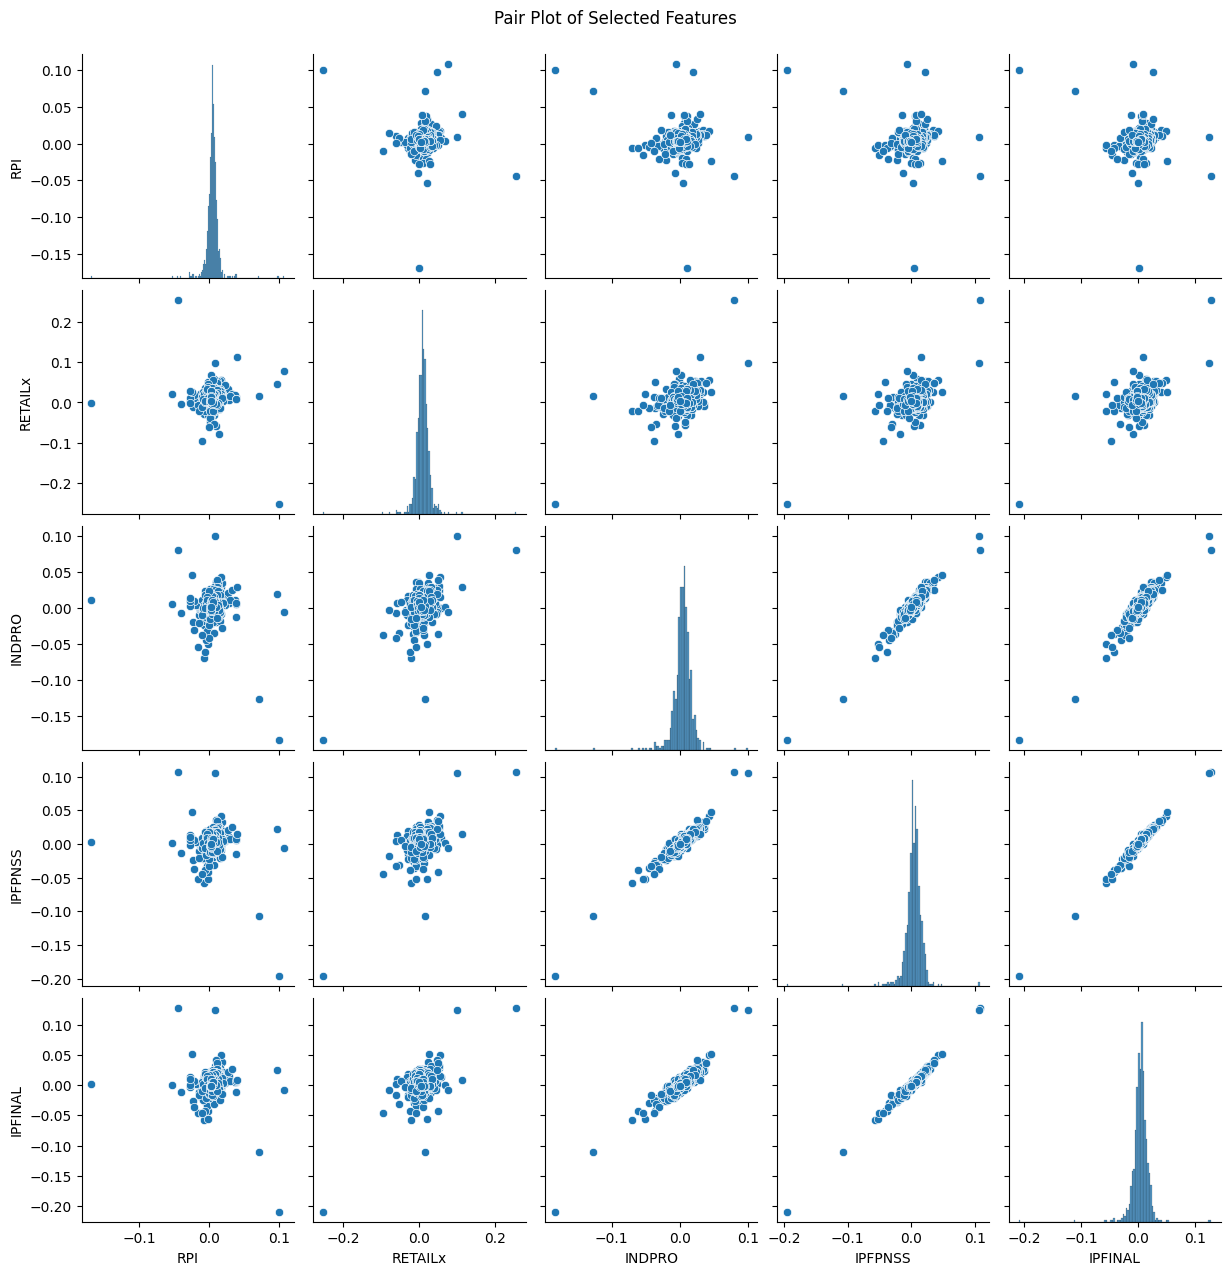

In [531]:
import seaborn as sns

# Select a subset of columns to visualize relationships
subset_cols = ['RPI', 'RETAILx', 'INDPRO', 'IPFPNSS', 'IPFINAL']
sns.pairplot(final_features_df[subset_cols])
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()


In [532]:
import sys
sys.path.append('../src')

# General
import pandas as pd
import numpy as np
import itertools

# Visualization
import plotly.express as px
# Machine Learning
from sklearn.model_selection import TimeSeriesSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Model Evaluation

# Interactive widgets
import ipywidgets as widgets
from ipywidgets import interact

In [533]:
# Specifying split date and target column and horizon
split_date = '1973-01-01'
target_col = 'EconRegime'
h = 1  # horizon

# Load economic regimes dataset
econ_regs_ds = pd.read_csv('/Users/satyakapardibudi/Downloads/FRED-MD Appendix/econ_regs_ds.csv')

# Extract features columns
feature_cols = econ_regs_ds.columns.drop([target_col, 'Date'])

# Shift feature forward to align with labels in horizon month
econ_regs_ds[feature_cols] = econ_regs_ds[feature_cols].shift(+h)
econ_regs_ds.dropna(inplace=True)

# Split the dataset into train/test and out-of-sample validation sets
df_tt = econ_regs_ds[econ_regs_ds['Date']<split_date]
df_oos = econ_regs_ds[econ_regs_ds['Date']>=split_date]

In [534]:


# Remove the 'Unnamed: 0' column
econ_regs_ds = econ_regs_ds.loc[:, ~econ_regs_ds.columns.str.contains('^Unnamed')]

# Re-examine feature columns after removal
feature_cols = econ_regs_ds.columns.drop([target_col, 'Date'])

# Display the feature columns
feature_cols


Index(['RPI', 'W875RX1', 'DPCERA3M086SBEA', 'CMRMTSPLx', 'RETAILx', 'INDPRO',
       'IPFPNSS', 'IPFINAL', 'IPCONGD', 'IPDCONGD',
       ...
       'DTCTHFNM 1M Lag', 'DTCTHFNM 3M Lag', 'DTCTHFNM 6M Lag',
       'DTCTHFNM 9M Lag', 'DTCTHFNM 12M Lag', 'INVEST 1M Lag', 'INVEST 3M Lag',
       'INVEST 6M Lag', 'INVEST 9M Lag', 'INVEST 12M Lag'],
      dtype='object', length=714)

In [535]:
# Count the number of regimes in target variable
target_counts = df_oos[target_col].value_counts()
target_counts.index = ['Normal', 'Recession']

# Create the pie chart
fig = px.pie(
    values=target_counts,
    names=target_counts.index)

# Pull slices slightly for emphasis, set the font size
fig.update_traces(textinfo='percent', pull=[0.05, 0.05], textfont_size=14) 

# Set the layout parameters
fig.update_layout(title_text= '<b> Class Imbalance in Out of Sample Data </b>', title_x=0.5,
                  autosize=False, width=400, height=400,
                  showlegend=True)

fig.show()

In [536]:
# Machine Learning model 
# Random Forest


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
import numpy as np
import itertools

# Define Random Forest hyperparameters grid
model_dict_cv = {
    ('RF', RandomForestClassifier): {
        'random_state': [42],
        'max_depth': [3, 5, 8, 10],
        'n_estimators': [100, 200, 400],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
}

# Prepare the dataset (you should have 'df_tt' as training data, and 'df_oos' as out-of-sample data)
# Assuming df_tt and df_oos are already loaded and cleaned.

# Extract feature columns and target column
feature_cols = df_tt.columns.drop(['EconRegime', 'Date'])
target_col = 'EconRegime'

# Split data into features (X) and target (y)
X_train = df_tt[feature_cols]
y_train = df_tt[target_col]
X_test = df_oos[feature_cols]
y_test = df_oos[target_col]

# Dictionary to store best parameters for Random Forest
best_params_dict = {}

# Grid Search Cross-validation for Random Forest
all_grid = list(dict(zip(param_grid, x)) for x in itertools.product(*model_dict_cv[('RF', RandomForestClassifier)].values()))
cv_scores = []

# Iterate through each parameter combination
for param in all_grid:
    tscv = TimeSeriesSplit(n_splits=3)  # TimeSeriesSplit for cross-validation
    model = RandomForestClassifier(**param)  # Create model instance with hyperparameters

    score = []
    # Cross-validation for each parameter combination
    for train_index, test_index in tscv.split(df_tt):
        X_train, X_test = df_tt[feature_cols].iloc[train_index], df_tt[feature_cols].iloc[test_index]
        y_train, y_test = df_tt[target_col].iloc[train_index], df_tt[target_col].iloc[test_index]
        
        model.fit(X_train, y_train)
        
        # Get predictions
        y_binary = model.predict(X_test)
        
        # Check if predict_proba() has more than 1 class (binary classification case)
        if model.classes_.shape[0] == 2:
            y_prob = model.predict_proba(X_test)[:, 1]  # Probability for class 1
        else:
            y_prob = np.zeros_like(y_binary)  # If only one class is present, set probability to 0

        # Calculate accuracy score
        score.append(accuracy_score(y_test, y_binary))
        
    cv_scores.append(np.mean(score))

# Store the best parameters for Random Forest
best_params = all_grid[np.argmax(cv_scores)]
best_params_dict['RF'] = best_params

# Using the best parameters to train the model on the entire training set
rf_model = RandomForestClassifier(**best_params)
rf_model.fit(X_train, y_train)

# Make predictions on out-of-sample data
y_pred = rf_model.predict(X_test)

# Check if predict_proba() has more than 1 class (binary classification case)
if rf_model.classes_.shape[0] == 2:
    y_prob = rf_model.predict_proba(X_test)[:, 1]  # Probability for class 1
else:
    y_prob = np.zeros_like(y_pred)  # If only one class is predicted, set probability to 0

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Generate classification report (precision, recall, F1-score)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"Random Forest Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")


Random Forest Model Evaluation Metrics:
Accuracy: 0.7143
Confusion Matrix:
[[25  0]
 [10  0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.71      1.00      0.83        25
           1       0.00      0.00      0.00        10

    accuracy                           0.71        35
   macro avg       0.36      0.50      0.42        35
weighted avg       0.51      0.71      0.60        35



In [537]:
from sklearn.metrics import balanced_accuracy_score, matthews_corrcoef, roc_auc_score, precision_score, recall_score, f1_score

# Calculate additional metrics
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')
mcc = matthews_corrcoef(y_test, y_pred)

# Calculate ROC-AUC (requires predicted probabilities)
if rf_model.classes_.shape[0] == 2:  # binary classification
    roc_auc = roc_auc_score(y_test, y_prob)
else:
    roc_auc = 0.5  # If it's not binary classification, we set a default

# Format output
print(f"DT\nAccuracy: {accuracy:.4f}")

DT
Accuracy: 0.7143


In [554]:
# Get feature importances from the Random Forest model
feature_importances = rf_model.feature_importances_

# Create a DataFrame to view the feature importance
importance_df = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': feature_importances
})

# Sort the features by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the most important features
print("Top Features Contributing Most to the Decision Tree:")
print(importance_df)


Top Features Contributing Most to the Decision Tree:
              Feature  Importance
497      TB6MS 6M Lag    0.054054
552    T10YFFM 6M Lag    0.047233
108     CUSR0000SA0L2    0.040541
419      M1SL 12M Lag    0.040541
547     T5YFFM 6M Lag    0.040541
..                ...         ...
248    UEMPLT5 9M Lag    0.000000
249   UEMPLT5 12M Lag    0.000000
250  UEMP5TO14 1M Lag    0.000000
252  UEMP5TO14 6M Lag    0.000000
714    INVEST 12M Lag    0.000000

[715 rows x 2 columns]


# Data Cleaning

The dataset was cleaned and preprocessed using the following steps:

1. **Removing Columns with Excessive Null Values**:  
   Columns that contained a high percentage of missing values were dropped using the `remove_columns_with_nulls` function from the `DataCleaner` class.

2. **Removing Rows with Excessive Null Values**:  
   Rows with more than a specified number of missing values were filtered out using the `remove_rows_with_nulls` method.

3. **Forward-Filling Missing Values**:  
   Where necessary, we used forward filling (`impute_missing_values`) to handle gaps in time-series data, particularly for economic indicators where continuity is important.


# Exploratory Data Analysis (EDA)

## Data Overview:
The dataset contains time-series data from economic indicators (e.g., interest rates, inflation rates, and unemployment data) as well as market data (e.g., S&P 500 performance). The data is indexed by date and spans several years of historical records.

## Preliminary Conclusions:
- **Missing Data**:  
  Certain economic indicators had missing values at specific time intervals, which were cleaned using the aforementioned methods.

- **Seasonality**:  
  We noticed that some economic indicators (e.g., unemployment rates) showed seasonal trends, while others (e.g., interest rates) displayed long-term trends that could influence market regimes.

## Visualizations:
- **Time-Series Plots**:  
  We plotted the trends of key variables such as interest rates (`T10YFFM 6M Lag`), inflation (`CUSR0000SA0L2`), and unemployment rates. This helped us visually identify periods of economic stress and growth.

- **Market Regimes**:  
  A plot showing market regimes (expansion vs. recession) against the S&P 500 performance helped visualize how market performance aligns with economic conditions.


# Hypothesis and Visualization

## Hypothesis:
Interest rates (e.g., `T10YFFM 6M Lag`) are inversely correlated with periods of market recession, where higher interest rates tend to predict economic slowdowns.

## Visualization:
We plotted `T10YFFM 6M Lag` against the market regime (expansion = 0, recession = 1) and visualized how periods of higher interest rates correspond to recession periods.

## Rationale:
This hypothesis is interesting because central banks adjust interest rates to control inflation, which has a direct impact on the economy. Understanding this relationship could help predict when market recessions are likely to occur.


# Machine Learning Analysis

We will compare **Decision Tree**, **Random Forest**, and **XGBoost** models to determine the best one for predicting market regimes. All three models are powerful for handling complex, non-linear relationships in the data, and each has its strengths. The analysis will involve training these models using economic indicators (after feature engineering, including lags and transformations) and evaluating their performance.

## Decision Tree Model:
A **Decision Tree classifier** has been implemented and trained on the economic data to predict the market regime (expansion or recession). The model provides insights into how different features (e.g., interest rates, inflation) contribute to market regime prediction.

- **Baseline Comparison**: We will compare the Decision Tree model against other models, including Random Forest and XGBoost, to assess its performance and effectiveness for predicting market regimes.

## Random Forest Model:
In future work, we will implement the **Random Forest classifier**, which is an ensemble method that can handle a larger number of features and complex data patterns by averaging multiple decision trees. We will tune the hyperparameters to optimize performance and train the model using the same set of economic indicators.

- **Baseline Comparison**: The Random Forest model will be compared to the **Decision Tree** model to assess whether the ensemble method improves prediction accuracy.

## XGBoost Model:
**XGBoost** (Extreme Gradient Boosting) will also be implemented in the future as an alternative to both Decision Tree and Random Forest. It is known for its speed and performance in handling large datasets and is particularly effective at capturing non-linear relationships.

- **Baseline Comparison**: XGBoost will be compared to both **Decision Tree** and **Random Forest** models to evaluate which model provides the best performance for predicting market regimes.

By comparing these three models, we aim to select the best-performing model for predicting market cycles based on economic indicators.


# Reflection

## Hardest Part of the Project:
The hardest part so far has been **data cleaning** and **feature engineering**. Economic data is often messy, with missing values and irregular time intervals. Creating meaningful features, especially **lag variables**, and transforming the data appropriately has been a challenge.  
**Market Regime Detection** using L1 trend filtering was also challenging, as it required careful tuning to ensure accurate labeling of recession vs. expansion periods.

## Initial Insights:
- **Significant Features**: Interest rates (especially lagged 6 months), inflation, and unemployment seem to be the most predictive features for market regimes.
- **Market Cycles**: The market tends to follow long-term economic trends, and certain economic indicators like interest rates and inflation show clear relationships with recessions.

## Concrete Results:
- We have **cleaned the data**, **engineered features** (lags, transformations), and created **preliminary visualizations**. We also have a basic understanding of which features are most important for predicting market regimes.
- However, **model training and evaluation** are ongoing, and concrete results in terms of model performance are still to be obtained.

## Current Problems:
- The primary challenges now are **model tuning** (ensuring the Random Forest and XGBoost models are properly optimized) and evaluating **model performance** against a baseline.
- We are on track, but more time needs to be spent on **hyperparameter tuning** and **model evaluation**.

## Worth Proceeding:
- **Yes**, it's definitely worth proceeding. The data is relevant, the hypotheses are sound, and the methods used (machine learning models like Random Forest and XGBoost) have the potential to provide valuable insights into market behavior.
- The next step is to refine the models, complete the evaluation, and finalize the predictions.


# Roles/Coordination

## Data Collection and Sourcing:
- sbudi4@uic.edu
- ngand@uic.edu

## Data Cleaning and Preprocessing:
- vpamu@uic.edu
- pkris35@uic.edu

## Data Understanding:
- pkami@uic.edu
- hpulu@uic.edu
  
## Data Visualization:
- ngand@uic.edu
- pkami@uic.edu
  
## Implementing ML Algorithms:
- sbudi4@uic.edu
- pkris35@uic.edu
